<h1 style='text-align:center'> Module 1 Assessment</h1>

This assessment is designed to test your understanding of the Mod 1 material. It covers:

* Python Fundamentals
* Pandas and Numpy
* Data Visualization
* Exploring Statistical Data



Read the instructions carefully. You will be asked both to write code and respond to a few short answer questions.

#### Note on the short answer questions
For the short answer questions _please use your own words_. The expectation is that you have **not** copied and pasted from an external source, even if you consult another source to help craft your response. While the short answer questions are not necessarily being assessed on grammatical correctness or sentence structure, do your best to communicate yourself clearly.

## Python Fundamentals

In the first section, we will work with various Python data types and try to accomplish certain tasks using some Python fundamentals. Below, we've defined a dictionary with soccer player names as keys for nested dictionaries containing information about each players age, nationality, and a list of teams they have played for.   

In [139]:
players = {
	'L. Messi': {
		'age': 31,
		'nationality': 'Argentina',
		'teams': ['Barcelona']
	},
	'Cristiano Ronaldo': {
		'age': 33,
		'nationality': 'Portugal',
		'teams': ['Juventus', 'Real Madrid', 'Manchester United']
	},
	'Neymar Jr': {
		'age': 26,
		'nationality': 'Brazil',
		'teams': ['Santos', 'Barcelona', 'Paris Saint-German']
	},
	'De Gea': {
		'age': 27,
		'nationality': 'Spain',
		'teams': ['Atletico Madrid', 'Manchester United']
	},
	'K. De Bruyne': {
		'age': 27,
		'nationality': 'Belgium',
		'teams': ['Chelsea', 'Manchester City']
	}
}

**1) Create a `list` of all the keys in the `players` dictionary. Use python's documentation on dictionaries for help if needed. Store the list of player names in a variable called `player_names` to use in the next question.**

In [140]:
# Get the list of all player names from the dictionary
player_names = []
for player in players.keys():
    player_names.append(player)

**2) Great! Now that we have each players name, let's use that information to create a `list` of `tuples` containing each player's name along with their nationality. Store the list in a variable called `player_nationalities`**

In [141]:
# Generate list of tuples such that the first element in the tuple is 
# a players name and the second is their nationality 
# Ex: [('L. Messi', 'Argentina'), ('Christiano Ronaldo', 'Portugal'), ...]
player_nationalities = []
for player in player_names:
    player_nationalities.append((player, players[player]["nationality"]))

**3) Now, define a function called `get_players_on_team` that returns a `list` of the names of all the players who have played on a given team.** 

Your function should take two arguments: 
* a dictionary of player information
* a `string` of the team you are trying to find the players for 

**Be sure that your function has a `return` statement.**

In [142]:
# Define your get_players_on_team function here.
def get_players_on_team(player_info, team):
    players_on_team = []
    for player in player_info.keys():
        if team in player_info[player]["teams"]:
            players_on_team.append(player)
    return players_on_team
    

In [143]:
players_on_manchester_united = get_players_on_team(players,'Manchester United')

## Pandas and Numpy

In this section you will be doing some preprocessing and exploratory data analysis for a dataset for the videogame FIFA19 (https://www.kaggle.com/karangadiya/fifa19).  The dataset contains both data for the game as well as information about the players' real life careers.  

**1) Read the CSV file into a pandas dataframe**

The data you'll be working with is found in a file called './data/fifa.csv'.  Use your knowledge of pandas to create a new dataframe using the csv data. 

Check the contents of your dataframe with `df.head()`</b>

In [144]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [145]:
df = pd.read_csv("./data/fifa.csv")
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500.0
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100.0
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100.0
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600.0
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400.0


**2) Check for duplicates**
    
**First, check how many columns and rows are in the dataset, then check how many unique values are in the "ID" column.**

In [146]:
# code here to see the size of the dataframe
print(df.shape)

(20000, 89)


In [147]:
# code here to check number of unique ids
print(len(df.ID.unique()))


18207


<b> 3) Drop Duplicates
    
It looks like there are duplicates.  Get rid of them by dropping duplicate rows. After you have dropped them, see how many rows are remaining.</b>

In [148]:
# code here
df = df.drop_duplicates(subset="ID")


In [149]:
# now see how many rows there are
df.shape[0]

18207

<b> 4. Drop n/a rows for "Release Clause"
    
Drop rows for which "Release Clause" is none or not given. This is part of a soccer player's contract dealing with being bought out by another team. After you have dropped them, see how many rows are remaining.</b>

In [150]:
# code here to drop n/a rows
df = df[~df["Release Clause"].isna()]


In [151]:
df.shape[0]

16643

<b> 5) Convert players' heights to inches. Replace the original height column.
First create a function, then use it on your dataframe. Create a function that convert a string into a integer and then apply that function to all of the height column.</b>

In [152]:
# code here to write a helper function
def convert_height(height):
    '''
    inputs: height (string)
    ----
    returns: height in inches (int)
    '''
    height = height.split("'")
    feet = int(height[0])
    inches = int(height[1])
    return feet*12+inches

In [153]:
# test here
convert_height("5'7")

67

In [154]:
# code here to use the function on the height column
df.Height = df.Height.apply(convert_height)
df.Height.head()

0    67
1    74
2    69
3    76
4    71
Name: Height, dtype: int64

## Data Visualization

<b> 1) Make a histogram of players age
    
_Add a title and x axis label._ Use whichever plotting library you are most comfortable with. </b>

In [155]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

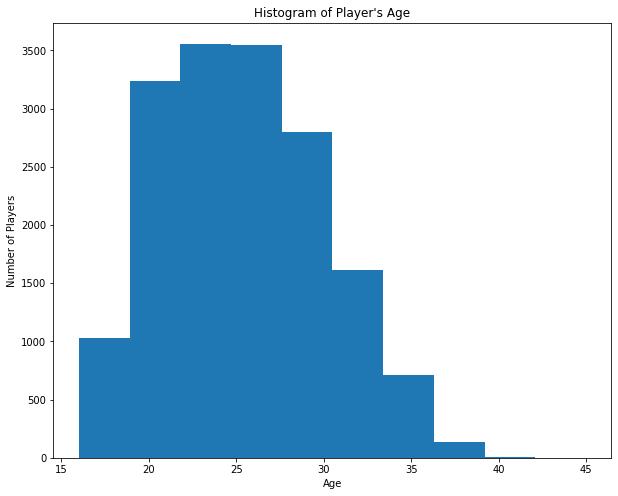

In [156]:
plt.figure(figsize = (10,8))
plt.hist(df.Age)
plt.xlabel("Age")
plt.ylabel("Number of Players")
plt.title("Histogram of Player's Age")
plt.show()

<b> 2) Make a bar chart for the 10 countries with the most players (by nationality)</b>

Make sure to include x labels on your chart!

In [157]:
# code here to get the top 10 countries with the most players
top_ten = df.groupby("Nationality")["ID"].count().sort_values(ascending=False)[0:10]


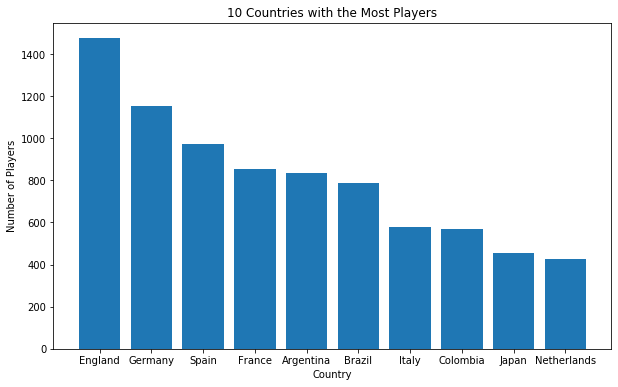

In [158]:
# code here to plot a bar chart
plt.subplots(figsize=(10,6))
plt.bar(top_ten.index, top_ten)
plt.xlabel("Country")
plt.ylabel("Number of Players")
plt.title("10 Countries with the Most Players")
plt.show()


<b> 3) Make a scatter plot for the player stats StandingTackle and SlidingTackle

What can we say about these two features? </b>

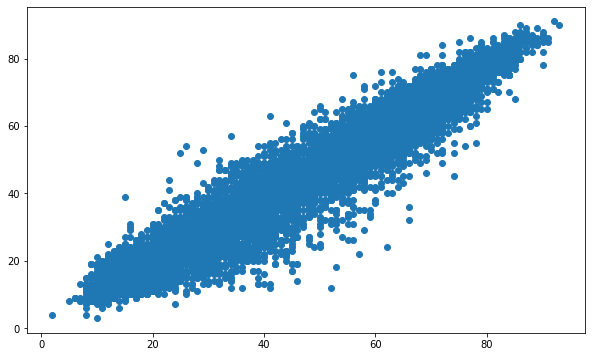

In [159]:
# code here to plot a scatterplot
plt.subplots(figsize = (10,6))
plt.scatter(df.StandingTackle, df.SlidingTackle)
plt.show()

In [160]:
# Your written answer here
# It looks like the two features are roughly directly proportional to one another.

### Exploring Statistical Data

We'll continue using the same FIFA 2019 dataset.  This section will assess your ability to use numpy and work with summary statistics.

<b>1) Convert the Release Clause Price from Euros to Dollars
    
Create a new column that has the 'release_clause' in dollars.

1.2 Dollars = 1 Euro.</b>

In [161]:
# code here to convert the column of euros to dollarss
df["Release Clause Dollars"] = df["Release Clause"].apply(lambda x: x*1.2)

<b>2) Get summary statistics for all numeric columns
    
(Please don't do each column individually!)</b>

In [162]:
# code here
df.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Release Clause Dollars
count,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,...,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,1.664300e+04
mean,5422.904945,213845.010094,25.226221,66.162771,71.140900,1595.383404,1.114823,2.942919,2.349516,19.657213,...,47.328967,47.776302,45.751607,16.747521,16.515712,16.355765,16.503936,16.837409,228201.273629,2.738415e+05
std,2721.036613,30546.285826,4.716588,7.008236,6.151409,275.723076,0.398559,0.659933,0.755855,16.054811,...,19.937220,21.681809,21.295201,17.832273,17.033907,16.615668,17.151713,18.090985,299251.865865,3.591022e+05
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,...,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1000.000000,1.200000e+03
25%,3175.500000,199569.500000,21.000000,62.000000,67.000000,1452.000000,1.000000,3.000000,2.000000,8.000000,...,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000,2500.000000,3.000000e+03
50%,5488.000000,221493.000000,25.000000,66.000000,71.000000,1633.000000,1.000000,3.000000,2.000000,17.000000,...,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000,19800.000000,2.376000e+04
75%,7770.000000,236802.000000,29.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,...,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000,431000.000000,5.172000e+05
max,9999.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,...,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000,999000.000000,1.198800e+06


<b>3) What is the mean age and the median age for the players in this dataset?  How are the mean and median related to each other?</b>

In [163]:
print(df["Age"].mean(), df["Age"].median())

25.226221234152497 25.0


In [164]:
# Your written answer here
#The mean is slightly higher than the median in this case.  Mean and median are both measures of central tendency. 
#The mean is more heavily affected by statistical outliers than the median.

#### 4) Who is the oldest player in Argentina and how old is he?  

In [165]:
# code here
df[df["Nationality"] == "Argentina"][["Name","Age"]].sort_values(by = "Age", ascending= False)[0:1]

,Name,Age
7225,C. Muñoz,41


In [166]:
# Your written answer here
# C. Muñoz is 41 years old.